In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image


In [10]:
img_path = r"ACGPN_Dataset\ACGPN_traindata\train_mask\11994.png"
img_path

'ACGPN_Dataset\\ACGPN_traindata\\train_mask\\11994.png'

In [16]:
def openimage(path,mode=0):
    if mode==1:
        return np.expand_dims(np.array(Image.open(path).convert("L")),axis=-1)  # opens in grayscale, we need to open each posemap in b/w
    else:
        return(np.array(Image.open(path)))


In [19]:
img_np = openimage(img_path,1)
np.max(img_np)

255

In [15]:
img = Image.open(img_path)
img = img.convert('L')
img_np = np.array(img)/255
np.min(img_np)

0.0

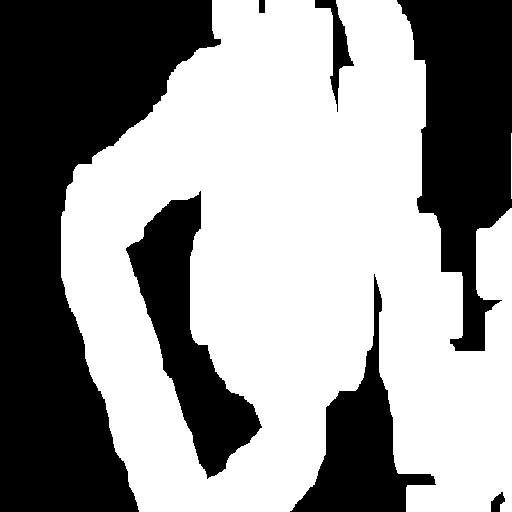

In [12]:
img

In [20]:
def crop_image(img_np, height, width):
    """
    Crops an image to a specified height and width without maintaining the aspect ratio.

    Args:
      img_np: A NumPy array representing the image.
      height: The desired height of the cropped image.
      width: The desired width of the cropped image.

    Returns:
      A NumPy array representing the cropped image.

    Raises:
      ValueError: If the desired height or width is larger than the original image dimensions.
    """

    height_orig, width_orig = img_np.shape[:2]

    if height > height_orig or width > width_orig:
      raise ValueError("Desired height or width cannot be larger than the original image dimensions.")

    start_x = (width_orig - width) // 2
    end_x = start_x + width
    start_y = (height_orig - height) // 2
    end_y = start_y + height

    return img_np[start_y:end_y, start_x:end_x]

In [23]:
crop_img_np = crop_image(img_np, 256, 192)
np.max(crop_img_np), np.min(crop_img_np)

(255, 0)

In [134]:
segments = openimage(r"ACGPN_Dataset\ACGPN_traindata\train_label\000003_0.png",1)
background = np.where(segments == 0, 0, 1) # inverted, 1 channel
upcloth = np.where(segments == 4, 0, 1)
upcloth_1 = np.where(segments == 4, 1.0, 0.0)
background.shape, upcloth.shape

((256, 192, 1), (256, 192, 1))

In [135]:
paint = openimage(r"ACGPN_Dataset\ACGPN_traindata\train_mask\00006.png",1)/255
paint = crop_image(paint,256,192)
paint = np.where(paint > 0.5, 0, 1)
paint.shape

(256, 192, 1)

In [136]:
np.max(paint), np.min(paint)

(1, 0)

In [137]:
combined_mask = background * upcloth * paint
combined_mask.shape

(256, 192, 1)

In [138]:
image = openimage(r"ACGPN_Dataset\ACGPN_traindata\train_img\000003_0.jpg",0)

In [139]:
I_w = image * combined_mask

In [140]:
I_w.shape

(256, 192, 3)

In [141]:
np.max(I_w[:,:,0]),np.max(I_w[:,:,1]),np.max(I_w[:,:,2])

(255, 246, 249)

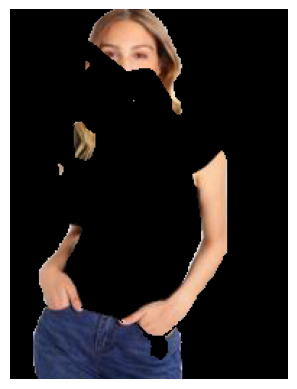

In [142]:
plt.imshow(I_w/255)
plt.axis('off')  # Turn off axes for cleaner display
plt.show()

In [143]:
T_cR = (image * upcloth_1)/255

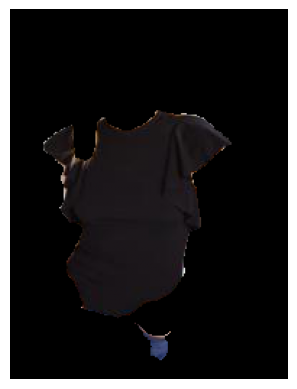

In [144]:
plt.imshow(T_cR)
plt.axis('off')  # Turn off axes for cleaner display
plt.show()